In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
# The statistical module used to run chi square test
import scipy.stats as stats

In [39]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats

In [4]:
df = pd.read_csv("200731COVID19MEXICO.csv", encoding = "ISO-8859-1")

In [5]:
actDate = df['FECHA_ACTUALIZACION'][0]

In [6]:
df.drop(['FECHA_ACTUALIZACION', 'RESULTADO', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN'], axis=1)

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,UCI
0,1765cb,2,3,15,2,15,15,118,1,12/06/20,...,2,2,2,2,2,2,1,1,99,97
1,01cd82,2,3,27,2,27,27,4,1,01/07/20,...,2,1,2,2,2,2,2,1,99,97
2,16c05d,2,3,15,2,15,15,24,1,20/06/20,...,2,2,2,1,2,2,2,1,99,97
3,106446,2,4,15,2,15,15,121,2,20/04/20,...,1,2,2,2,2,2,2,99,99,2
4,1162db,2,4,9,1,15,15,58,1,27/04/20,...,2,1,2,2,2,2,2,99,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424632,10a8e2,2,12,21,2,21,21,114,2,11/07/20,...,2,1,2,2,1,2,2,1,99,2
424633,0cd7eb,1,4,20,1,20,20,184,1,05/07/20,...,2,2,1,2,2,2,2,99,99,97
424634,04c893,2,12,12,1,12,12,1,1,04/07/20,...,2,2,2,2,2,2,2,1,99,97
424635,186381,1,12,1,2,32,1,1,2,04/07/20,...,2,2,2,1,1,2,1,2,99,2


In [7]:
df.dtypes

FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO                int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO               int64
MIGRANTE                int64
PAIS_NACIONALIDAD      object
PAIS_ORIGE

In [8]:
df['muerte'] = np.where(df['FECHA_DEF']!= '9999-99-99', True, False)

In [9]:
mun_df = pd.read_csv("catun_municipio.csv", encoding = "ISO-8859-1")
mun_list = mun_df[['cve_mun','nom_mun','cve_ent','nom_ent']]
est_df = pd.read_csv("CATUN_ENTIDAD.csv", encoding = "ISO-8859-1")

In [10]:
sector_counts = df["SECTOR"].value_counts().rename_axis('SECTOR').reset_index(name='CASOS')

In [11]:
sector_deaths = df.groupby('SECTOR')['muerte'].apply(lambda x: (x==True).sum()).reset_index(name='FALLECIMIENTOS')

In [12]:
catSector_df = pd.read_csv("catSector.csv", encoding = "ISO-8859-1")
catSector_df = catSector_df[['ï»¿CLAVE', 'DESCRIPCIÃN']]
catSector_df.columns = ['SECTOR', 'NOMBRE']

In [13]:
mergeSector_df = pd.merge(sector_counts, sector_deaths, on="SECTOR", how="outer").sort_values(by=['SECTOR'])
statsSector_df = pd.merge(mergeSector_df, catSector_df, left_on='SECTOR', right_on='SECTOR', how="left").sort_values(by=['CASOS'])
statsSector_df = statsSector_df[['SECTOR', 'NOMBRE', 'CASOS', 'FALLECIMIENTOS']]
statsSector_df['TASA_FALLECIMIENTOS'] = statsSector_df['FALLECIMIENTOS']/statsSector_df['CASOS']
statsSector_df

,SECTOR,NOMBRE,CASOS,FALLECIMIENTOS,TASA_FALLECIMIENTOS
1,2,DIF,31,0,0.000000
0,1,CRUZ ROJA,42,3,0.071429
11,13,UNIVERSITARIO,295,43,0.145763
5,7,MUNICIPAL,423,15,0.035461
8,10,SEDENA,2919,331,0.113395
9,11,SEMAR,3221,190,0.058988
12,99,NO ESPECIFICADO,3253,377,0.115893
6,8,PEMEX,5206,768,0.147522
2,3,ESTATAL,9530,1111,0.116579
7,9,PRIVADA,12851,570,0.044355


In [14]:
tasaFallProm =  statsSector_df['FALLECIMIENTOS'].sum()/statsSector_df['CASOS'].sum()
tasaFallProm

0.10994802619649253

<BarContainer object of 13 artists>

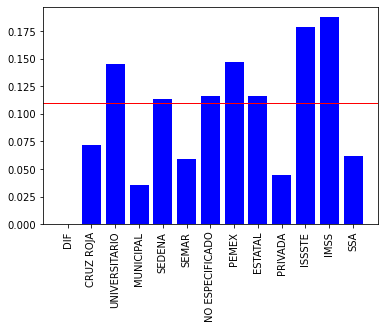

In [15]:
plt.xticks(rotation='vertical')
plt.axhline(y=tasaFallProm,linewidth=1, color='red')
plt.bar(statsSector_df['NOMBRE'], statsSector_df['TASA_FALLECIMIENTOS'], color="b", align="center")

In [16]:
state_counts = df["ENTIDAD_RES"].value_counts().rename_axis('ENTIDAD').reset_index(name='CASOS')
state_deaths = df.groupby('ENTIDAD_RES')['muerte'].apply(lambda x: (x==True).sum()).reset_index(name='FALLECIMIENTOS')

In [20]:
est_df.columns.values[0] = "ID"
est_df.columns.values[1] = "NOMBRE_ESTADO"

In [18]:
catEstado_df = est_df[['ID', 'NOMBRE_ESTADO']]

In [48]:
mergeEstado_df = pd.merge(state_counts, state_deaths,  left_on='ENTIDAD', right_on='ENTIDAD_RES', how="outer").sort_values(by=['ENTIDAD'])
statsEstado_df = pd.merge(mergeEstado_df, catEstado_df, left_on='ENTIDAD', right_on='ID', how="left").sort_values(by=['NOMBRE_ESTADO'])
statsEstado_df = statsEstado_df[['ENTIDAD', 'NOMBRE_ESTADO', 'CASOS', 'FALLECIMIENTOS']]
statsEstado_df['TASA_FALLECIMIENTOS'] = statsEstado_df['FALLECIMIENTOS']/statsEstado_df['CASOS']
statsEstado_df.sort_values(by=['TASA_FALLECIMIENTOS'], inplace = True)
statsEstado_df

,ENTIDAD,NOMBRE_ESTADO,CASOS,FALLECIMIENTOS,TASA_FALLECIMIENTOS
2,3,Baja California Sur,4305,175,0.040650
10,11,Guanajuato,20770,980,0.047183
4,5,Coahuila de Zaragoza,12749,619,0.048553
23,24,San Luis PotosÃ­,9316,463,0.049699
27,28,Tamaulipas,16489,987,0.059858
18,19,Nuevo LeÃ³n,17138,1064,0.062084
0,1,Aguascalientes,4028,254,0.063059
9,10,Durango,4039,282,0.069819
15,16,MichoacÃ¡n de Ocampo,9759,771,0.079004
30,31,YucatÃ¡n,9630,859,0.089200


<BarContainer object of 32 artists>

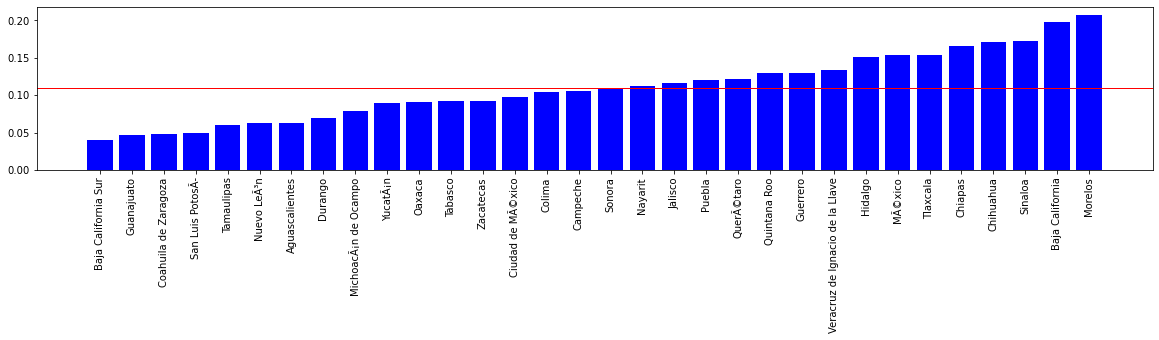

In [49]:
plt.figure(figsize=(20,3))
plt.xticks(rotation='vertical')
plt.axhline(y=tasaFallProm,linewidth=1, color='red')
plt.bar(statsEstado_df['NOMBRE_ESTADO'], statsEstado_df['TASA_FALLECIMIENTOS'], color="b", align="center")